Successfully loaded weights from C:\Users\shiyu\OneDrive\Desktop\CAT-DCGAN\saved_model\gen.pkl!
Successfully loaded weights from C:\Users\shiyu\OneDrive\Desktop\CAT-DCGAN\saved_model\disc.pkl!


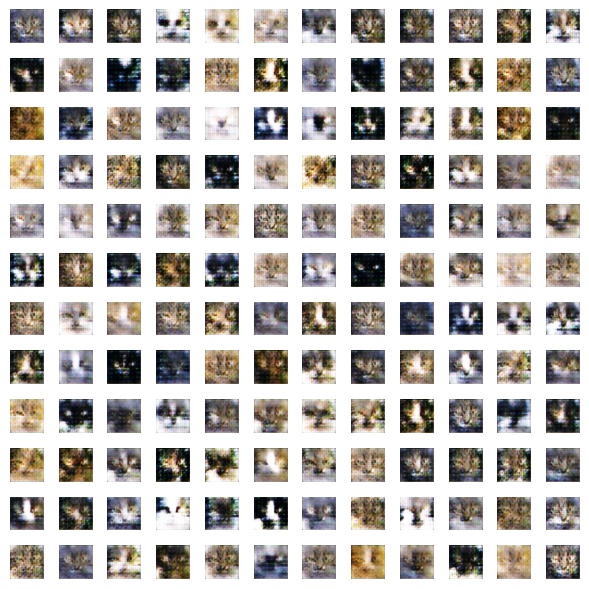

In [4]:
%run network.ipynb
import torch.optim as optim
import random
import os
from PIL import Image
from torchvision import transforms, datasets
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

def main():
    gen = GAN_Gen()
    optim_g = optim.Adam(gen.parameters(), lr=0.1)
    load_w(gen, optim_g, "gen.pkl")
    disc = GAN_Dis()
    optim_d = optim.Adam(disc.parameters(), lr=0.1)
    load_w(disc, optim_d, "disc.pkl")
    seed = torch.normal(0, 1, (144, 128))
    #print(disc(gen(seed)))
    images = gen(seed).view(144, 3, 64, 64)
    images_np = images.detach().numpy()
    num_rows, num_cols = 12, 12
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 6))
    axs = axs.flatten()

    for i in range(num_rows * num_cols):
        img = images_np[i].transpose(1, 2, 0)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

def load_w(model, optimizer, name):
    log_dir = os.path.abspath(os.path.expanduser("saved_model"))
    save_path = os.path.join(log_dir, name)
    if os.path.isfile(save_path):
        state_dict = torch.load(
            save_path,
            torch.device('cpu') if not torch.cuda.is_available() else None
        )
        model.load_state_dict(state_dict["model"])
        optimizer.load_state_dict(state_dict["optimizer"])
        print("Successfully loaded weights from {}!".format(save_path))
        return True
    else:
        raise ValueError("Failed to load weights from {}! File does not exist!".format(save_path))

main()   